In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('all_games.csv')

In [5]:
df.describe()

,meta_score
count,18800.000000
mean,70.648883
std,12.225006
min,20.000000
25%,64.000000
50%,72.000000
75%,80.000000
max,99.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18800 entries, 0 to 18799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          18800 non-null  object
 1   platform      18800 non-null  object
 2   release_date  18800 non-null  object
 3   summary       18686 non-null  object
 4   meta_score    18800 non-null  int64 
 5   user_review   18800 non-null  object
dtypes: int64(1), object(5)
memory usage: 881.4+ KB


In [7]:
df.head()

,name,platform,release_date,summary,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,98,7.4
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",98,8.4
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9


In [13]:
# Splitting the release date column so get the year for grouping

year_list = [int(i.split(',')[1]) for i in df['release_date']]
df['release_year'] = year_list

In [10]:
df.columns

Index(['name', 'platform', 'release_date', 'summary', 'meta_score',
       'user_review', 'release_year'],
      dtype='object')

In [12]:
# the average meta score rating by year

avg_rtg_by_yr = df.groupby('release_year').meta_score.mean().to_frame()
avg_rtg_by_yr

,meta_score
release_year,
1995,86.000000
1996,85.450000
1997,85.107143
1998,82.466667
1999,83.566038
2000,72.158192
2001,71.512015
2002,69.878361
2003,70.496879


<AxesSubplot:xlabel='release_year', ylabel='meta_score'>

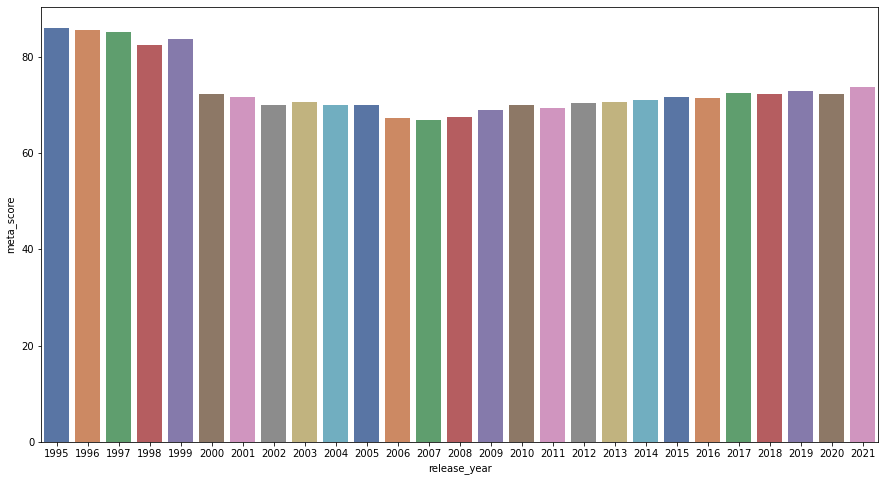

In [14]:
# Bar graph showing the average meta score rating by year

plt.figure(figsize = (15,8))
sns.barplot(x=avg_rtg_by_yr.index, y='meta_score', palette="deep", data=avg_rtg_by_yr)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, ' Nintendo 64'),
  Text(1, 0, ' PlayStation'),
  Text(2, 0, ' PlayStation 3'),
  Text(3, 0, ' Dreamcast'),
  Text(4, 0, ' Xbox 360'),
  Text(5, 0, ' Wii'),
  Text(6, 0, ' Xbox One'),
  Text(7, 0, ' PC'),
  Text(8, 0, ' Switch'),
  Text(9, 0, ' PlayStation 2'),
  Text(10, 0, ' PlayStation 4'),
  Text(11, 0, ' GameCube'),
  Text(12, 0, ' Xbox'),
  Text(13, 0, ' Wii U'),
  Text(14, 0, ' Game Boy Advance'),
  Text(15, 0, ' 3DS'),
  Text(16, 0, ' Xbox Series X'),
  Text(17, 0, ' DS'),
  Text(18, 0, ' PlayStation Vita'),
  Text(19, 0, ' PlayStation 5'),
  Text(20, 0, ' PSP'),
  Text(21, 0, ' Stadia')])

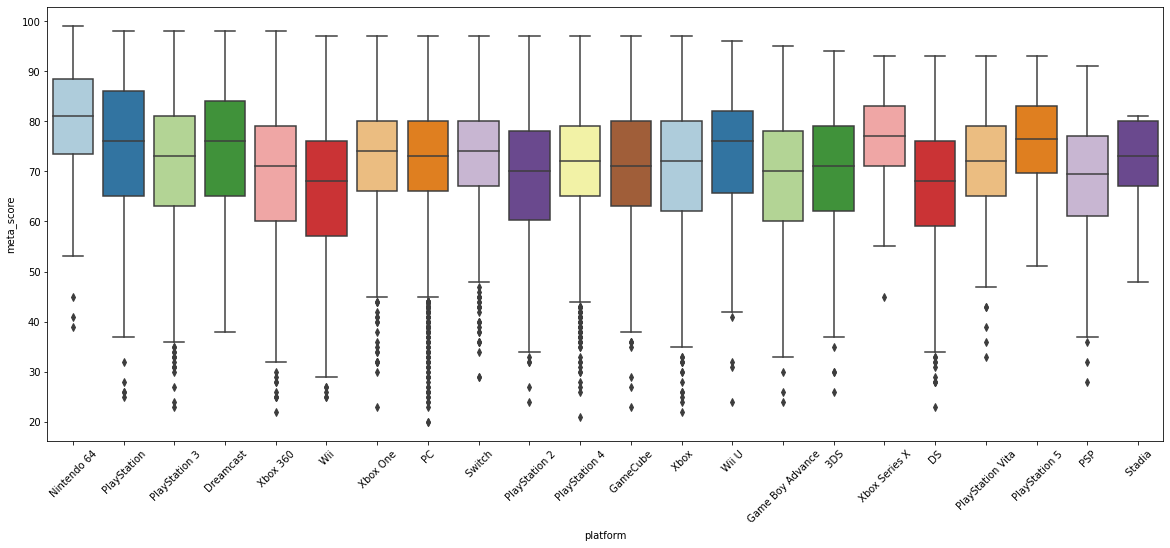

In [15]:
# Box plot showing the distribution of game ratings by platform

plt.figure(figsize = (20,8))
sns.boxplot(x="platform", y="meta_score", palette="Paired", data=df)
plt.xticks(rotation=45)

In [17]:
# Platforms by highest average meta score

avg_rtg_by_pltfrm = df.groupby(['platform'], as_index=False).meta_score.mean().sort_values(by='meta_score', ascending=False)
avg_rtg_by_pltfrm

,platform,meta_score
5,Nintendo 64,78.436620
21,Xbox Series X,75.987013
12,PlayStation 5,75.427419
2,Dreamcast,74.072000
8,PlayStation,73.342246
15,Switch,72.523231
17,Wii U,72.423913
20,Xbox One,72.395250
6,PC,71.797903
13,PlayStation Vita,71.062257


------------------------------------------------------------------------
-------------------------------------------------------------------------

Creating a second dataframe for user ratings since some are listed as 'tbd' which cannot be converted to float. After calculating by playform, the averages can be added in-place of the 'tbd' ratings in the original dataframe.

-------------------------------------------------------------------------
------------------------------------------------------------------------

In [18]:
df_for_usr_rtg_cnvrsn = df.copy()

In [19]:
df_for_usr_rtg_cnvrsn.head()

,name,platform,release_date,summary,meta_score,user_review,release_year
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1,1998
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,98,7.4,2000
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7,2008
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",98,8.4,1999
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9,2008


In [24]:
# Remove the tbd ratings from the user review column

df_for_usr_rtg_cnvrsn = df_for_usr_rtg_cnvrsn[df_for_usr_rtg_cnvrsn.user_review != 'tbd']

In [25]:
# Convert user review from string to float

df_for_usr_rtg_cnvrsn['user_review'] = pd.to_numeric(df_for_usr_rtg_cnvrsn['user_review'])

In [23]:
# Platforms by highest average user review

usr_rtg_by_pltfrm = df_for_usr_rtg_cnvrsn.groupby(['platform'], as_index=False).user_review.mean().sort_values('user_review', ascending=False)
usr_rtg_by_pltfrm

,platform,user_review
5,Nintendo 64,7.954930
2,Dreamcast,7.870588
8,PlayStation,7.722289
9,PlayStation 2,7.532494
3,Game Boy Advance,7.467049
4,GameCube,7.430751
14,Stadia,7.380000
17,Wii U,7.312155
7,PSP,7.267888
13,PlayStation Vita,7.267729


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, ' Nintendo 64'),
  Text(1, 0, ' Xbox Series X'),
  Text(2, 0, ' PlayStation 5'),
  Text(3, 0, ' Dreamcast'),
  Text(4, 0, ' PlayStation'),
  Text(5, 0, ' Switch'),
  Text(6, 0, ' Wii U'),
  Text(7, 0, ' Xbox One'),
  Text(8, 0, ' PC'),
  Text(9, 0, ' PlayStation Vita'),
  Text(10, 0, ' PlayStation 4'),
  Text(11, 0, ' GameCube'),
  Text(12, 0, ' PlayStation 3'),
  Text(13, 0, ' Xbox'),
  Text(14, 0, ' Stadia'),
  Text(15, 0, ' 3DS'),
  Text(16, 0, ' PlayStation 2'),
  Text(17, 0, ' Xbox 360'),
  Text(18, 0, ' Game Boy Advance'),
  Text(19, 0, ' PSP'),
  Text(20, 0, ' DS'),
  Text(21, 0, ' Wii')])

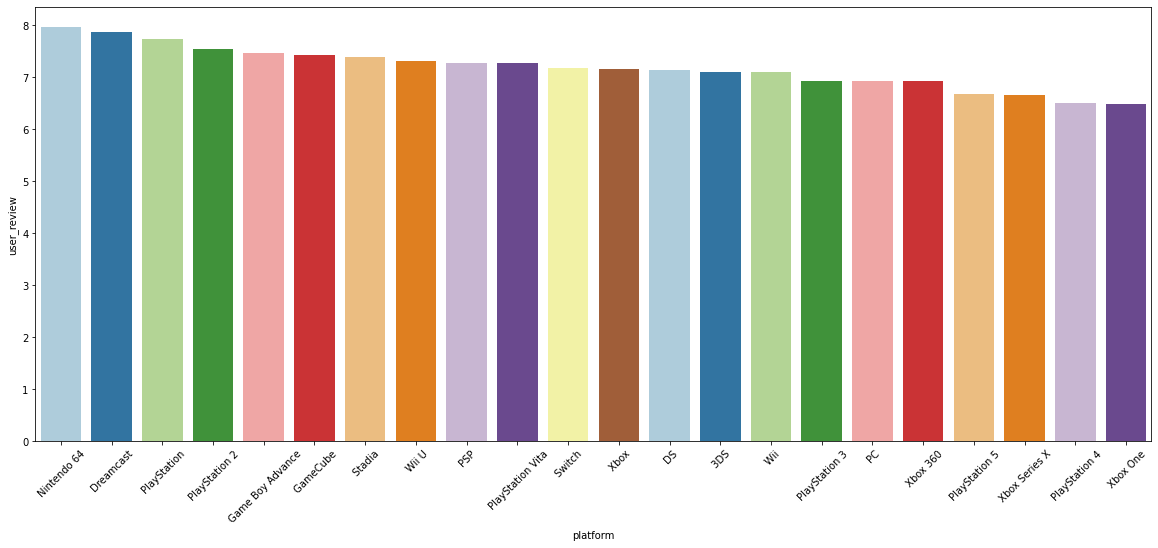

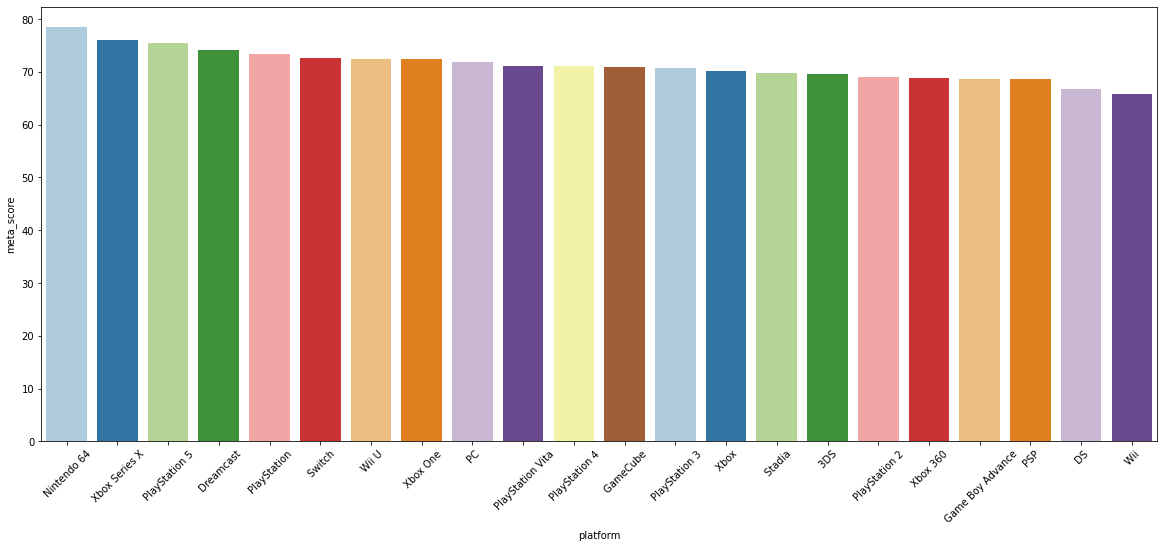

In [47]:
# Showing the differences in platforms by avg meta rating and avg user rating

plt.figure(figsize = (20,8))
sns.barplot(x="platform", y="user_review", palette="Paired", data=usr_rtg_by_pltfrm)
plt.xticks(rotation=45)

plt.figure(figsize = (20,8))
sns.barplot(x="platform", y="meta_score", palette="Paired", data=avg_rtg_by_pltfrm)
plt.xticks(rotation=45)

In [26]:
# Platforms with the most meta ratings over 90

ninety_plus_df = df.loc[df['meta_score'] >= 90]

In [27]:
ninety_plus_df

,name,platform,release_date,summary,meta_score,user_review,release_year
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1,1998
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,98,7.4,2000
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7,2008
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",98,8.4,1999
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9,2008
...,...,...,...,...,...,...,...
535,Rayman 2 Revolution,PlayStation 2,"January 30, 2001","First appearing on the N64 in 1999, our favori...",90,8.7,2001
536,Madden NFL 2001,PlayStation,"August 22, 2000",Get ready for a dose of bone-crunching footbal...,90,6.8,2000
537,Final Fantasy VIII,PlayStation,"September 7, 1999",The next chapter in Final Fantasy takes the se...,90,8.7,1999
538,Beetle Adventure Racing,Nintendo 64,"February 28, 1999",The adventure begins when you leave the road b...,90,7.7,1999


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, ' Nintendo 64'),
  Text(1, 0, ' PlayStation'),
  Text(2, 0, ' PlayStation 3'),
  Text(3, 0, ' Dreamcast'),
  Text(4, 0, ' Xbox 360'),
  Text(5, 0, ' Wii'),
  Text(6, 0, ' Xbox One'),
  Text(7, 0, ' PC'),
  Text(8, 0, ' Switch'),
  Text(9, 0, ' PlayStation 2'),
  Text(10, 0, ' PlayStation 4'),
  Text(11, 0, ' GameCube'),
  Text(12, 0, ' Xbox'),
  Text(13, 0, ' Wii U'),
  Text(14, 0, ' Game Boy Advance'),
  Text(15, 0, ' 3DS'),
  Text(16, 0, ' Xbox Series X'),
  Text(17, 0, ' DS'),
  Text(18, 0, ' PlayStation Vita'),
  Text(19, 0, ' PlayStation 5'),
  Text(20, 0, ' PSP')])

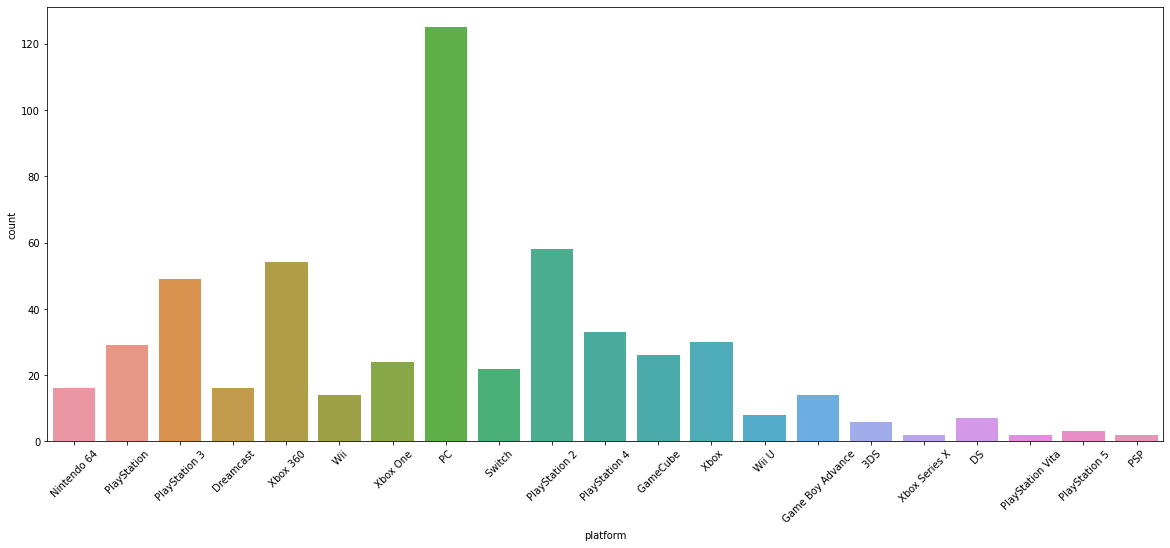

In [28]:
plt.figure(figsize = (20,8))
sns.countplot(x='platform', data=ninety_plus_df)
plt.xticks(rotation=45)

In [31]:
ninety_plus_df.loc[ninety_plus_df['platform'].str.contains('PC')].sort_values('meta_score', ascending=False)

,name,platform,release_date,summary,meta_score,user_review,release_year
10,Disco Elysium: The Final Cut,PC,"March 30, 2021",Disco Elysium - The Final Cut is the definitiv...,97,8.3,2021
25,Grand Theft Auto V,PC,"April 13, 2015",Los Santos: a sprawling sun-soaked metropolis ...,96,7.8,2015
32,The Orange Box,PC,"October 10, 2007",Games included in The Orange Box compilation: ...,96,9.3,2007
38,Half-Life,PC,"November 19, 1998",Half-Life combines great storytelling in the t...,96,9.1,1998
42,BioShock,PC,"August 21, 2007","Going beyond ""run and gun corridors,"" ""monster...",96,8.6,2007
...,...,...,...,...,...,...,...
455,Deus Ex,PC,"June 23, 2000","The game that incorporates RPG, action, advent...",90,9.2,2000
459,Half-Life 2: Episode Two,PC,"October 10, 2007",Half-Life 2: Episode Two is the second in a tr...,90,9.2,2007
461,Braid,PC,"April 10, 2009","Braid is a puzzle-platformer, drawn in a paint...",90,8.6,2009
462,The Chronicles of Riddick: Escape From Butcher...,PC,"December 8, 2004",Set before the events of both Universal Pictur...,90,8.6,2004


In [32]:
# Platform releases by year

pltfrm_releases_year = df.groupby(['release_year', 'platform'], as_index=False).count()

<AxesSubplot:xlabel='release_year', ylabel='name'>

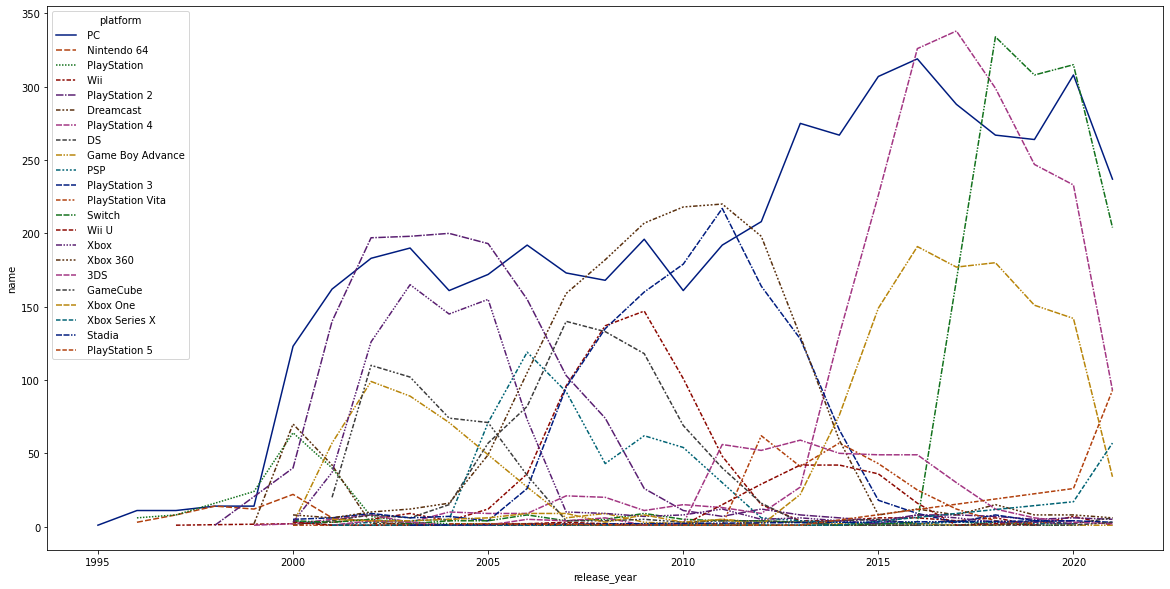

In [37]:
plt.figure(figsize = (20,10))
sns.lineplot(data=pltfrm_releases_year, x='release_year', y='name', hue='platform', palette='dark', style='platform')